In [1]:
import os
os.environ["TF_USE_LEGACY_KERAS"] = "1"
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0,1";
import random
random.seed(10)
import pandas as pd
data=pd.read_csv('/kaggle/input/issue-report-nlp/Issue_Report_Classification.csv')
#test=pd.read_csv('/kaggle/input/issue-report-nlp/Issue_Report_Classification-test.csv')

data.head(10)

,Unnamed: 0,issue_url,issue_label,issue_created_at,issue_author_association,repository_url,issue_title,issue_body
0,0,https://api.github.com/repos/eamodio/vscode-gi...,bug,2021-01-02T18:07:30Z,NONE,https://api.github.com/repos/eamodio/vscode-gi...,Welcome screen on every editor window is very ...,I just discovered Gitlens and find the functio...
1,1,https://api.github.com/repos/binwiederhier/pco...,bug,2020-12-31T18:19:31Z,OWNER,https://api.github.com/repos/binwiederhier/pcopy,"""pcopy invite"" and ""pcopy paste abc:"" does not...",NaN
2,2,https://api.github.com/repos/binwiederhier/pco...,bug,2021-01-03T04:33:36Z,OWNER,https://api.github.com/repos/binwiederhier/pcopy,"UI: Modal overlay is half transparent, shouldn...",NaN
3,3,https://api.github.com/repos/Sothatsit/RoyalUr...,enhancement,2020-12-25T00:46:00Z,OWNER,https://api.github.com/repos/Sothatsit/RoyalUr...,Make the loading screen scale with browser win...,Currently the loading wheel is a fixed size in...
4,4,https://api.github.com/repos/Malivil/TTT-Custo...,bug,2021-01-02T21:36:57Z,OWNER,https://api.github.com/repos/Malivil/TTT-Custo...,Spectator - Investigate a way to strip weapons...,To bring magneto stick floating
5,5,https://api.github.com/repos/jankuss/shroom/is...,enhancement,2020-12-31T13:43:33Z,NONE,https://api.github.com/repos/jankuss/shroom,Single Shroom instance for multiple canvases?,Is it possible to be able to create a single S...
6,7,https://api.github.com/repos/juniorGreg/moisi_...,bug,2020-12-27T01:40:34Z,OWNER,https://api.github.com/repos/juniorGreg/moisi_...,Correct navigation bar for some resolution,![Capture d’écran_2020-12-26_20-40-02](https:/...
7,8,https://api.github.com/repos/JoeParrinello/Bro...,enhancement,2021-01-02T16:05:43Z,OWNER,https://api.github.com/repos/JoeParrinello/Bro...,Return asset growth,Would have to cache:\r\n- Stock Ticker Request...
8,9,https://api.github.com/repos/Forty-Bot/trends....,enhancement,2021-01-03T03:46:34Z,OWNER,https://api.github.com/repos/Forty-Bot/trends.tf,Add filter for logs,Add the ability to filter logs like on other p...
9,10,https://api.github.com/repos/andrewjj20/post/i...,enhancement,2020-10-23T04:38:35Z,COLLABORATOR,https://api.github.com/repos/andrewjj20/post,Create trait for Meetup Service publisher stores,Developers could want different backing publis...


> Print the length of the dataset

In [2]:
data=data.sample(frac=0.25)
len(data)

180725

In [3]:
data=data[['issue_body', 'issue_label']]

In [4]:
data.head()

,issue_body,issue_label
518921,Starting with firmware 1.9.2 Shelly supports s...,enhancement
78913,NaN,enhancement
390926,It seems to me that `connect` clients do not h...,bug
609037,Adding vol option cleanup in d_parent_test.,bug
688312,It's about :\r\n- [x] Other\r\n\r\n**Explain t...,enhancement


> Drop nulls

In [5]:
data = data.dropna(subset=['issue_body'])

In [6]:
len(data)

162903

> Standardize the text

In [7]:
import re

def standardize_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s\']', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'http\s+' ,'',text)
    text = text.lower()
    return text.strip()

data['issue_body'] = data['issue_body'].apply(standardize_text)

data = data.drop_duplicates(subset=['issue_body'])

In [8]:
len(data)

156330

> Remove punctuation

In [9]:
import string

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

data['issue_body'] = data['issue_body'].apply(remove_punctuation)

In [10]:
possible_labels = data.issue_label.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'enhancement': 0, 'bug': 1, 'question': 2}

In [11]:
data['issue_label'] = data.issue_label.replace(label_dict)

/tmp/ipykernel_23/3275910327.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['issue_label'] = data.issue_label.replace(label_dict)


In [12]:
data.head(10)

,issue_body,issue_label
518921,starting with firmware 192 shelly supports so ...,0
390926,it seems to me that connect clients do not han...,1
609037,adding vol option cleanup in dparenttest,1
688312,its about x other explain the feature that you...,0
480329,in my pipeline saucectl reportshttpsgithubcoms...,1
186459,dann gibt es das konto zwar im authprovider ab...,1
463511,is your feature request related to a problem p...,0
219995,is your feature request related to a problem p...,0
266504,cardsdatatemplateselector is working initially...,1
345880,i acknowledge the following before proceeding ...,1


In [13]:
# import nltk
# nltk.download('punkt')
# from nltk.tokenize import word_tokenize
# def clean_tokenization(text):
#   return word_tokenize(text)

# nltk.download('stopwords')
# from nltk.corpus import stopwords

# stop_words=set(stopwords.words('english'))
# def clean_stopwords(token):
#    return [item for item in token if item not in stop_words]

# data['issue_body'] = data['issue_body'].apply(clean_tokenization)
# data['issue_body']=data['issue_body'].apply(clean_stopwords)


In [14]:
# import nltk
# nltk.download('punkt')

In [15]:
# import re
# import nltk
# import string
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer

In [16]:
# def convert_to_string(listReview):
#   return' '.join(listReview)
# data['issue_body']=data['issue_body'].apply(convert_to_string)

In [17]:
from imblearn.under_sampling import RandomUnderSampler

min_samples = data['issue_label'].value_counts().min()

# Resample each class to have the same number of samples (minimum number)
rus = RandomUnderSampler(sampling_strategy={class_label: min_samples for class_label in data['issue_label'].unique()})
X, y = rus.fit_resample(data.drop(columns='issue_label'), data['issue_label'])

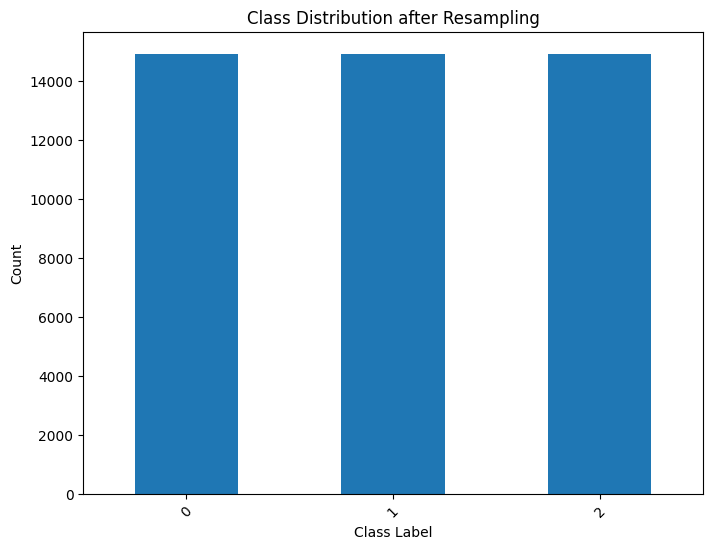

In [18]:
import matplotlib.pyplot as plt

# Get value counts of the resampled labels
label_counts = pd.Series(y).value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar')
plt.title('Class Distribution after Resampling')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [19]:
len(X), len(y)

(44763, 44763)

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(x_train), len(x_test)

(35810, 8953)

In [21]:
# for plotting comparisons
acc = []; pre = [] ; rec = [] ; f = []

In [22]:
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import sklearn.metrics as metrics

In [23]:
# Install ktrain
!pip install --upgrade pip -q
!pip install -q ktrain
!pip install tf-keras==2.15
!pip install transformers datasets torch tensorboard
import os 
os.environ['TF_USE_LEGACY_KERAS'] = '1'
import ktrain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.0 MB/s eta 0:00:00
  Attempting uninstall: tf-keras
    Found existing installation: tf_keras 2.15.1
    Uninstalling tf_keras-2.15.1:
      Successfully uninstalled tf_keras-2.15.1


In [24]:
# from ktrain import text

In [25]:
class_names=['enhancement', 'bug','question']
x_train = x_train['issue_body'].tolist()
y_train = y_train.to_numpy()
x_test = x_test['issue_body'].tolist()
y_test = y_test.to_numpy()


In [26]:
# (x_train, y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=x_train,
#                                                                       y_train=y_train,
#                                                                       x_test=x_test,
#                                                                       y_test=y_test,
#                                                                       class_names=class_names,
#                                                                       preprocess_mode='bert',maxlen=80)

In [27]:
# # Step 3: Load the pre-trained BERT model
# model = text.text_classifier('bert', (x_train, y_train), preproc=preproc)

# # Step 4: Initialize a ktrain classifier using BERT
# learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_test, y_test))

# # Step 5: Train the classifier on your data
# learner.fit_onecycle(2e-5, 1)

# # Step 6: Evaluate the classifier on a validation set
# learner.validate(val_data=(x_test, y_test))


In [28]:
# # It may need long time but ensures healthy training
# learner.lr_find(show_plot=True, max_epochs=2)

In [29]:
# # After the learning rate find process plot the curve of leaning rate - loss to select best learning rate
# learner.lr_plot()

In [30]:
# # Fit the leraner to the data for 2 epochs
# # Many other fit options available on the documentation of ktrain https://github.com/amaiya/ktrain
# learner.autofit(2e-5, 2)
# learner.validate(val_data=(x_test, y_test))

In [31]:
#predictor = ktrain.get_predictor(learner.model)
#predictor.save('/content/drive/MyDrive/NLP/my_predictor')

In [32]:
from transformers import AutoTokenizer

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("lxyuan/distilbert-base-multilingual-cased-sentiments-student")

# Tokenize the training data
train_encodings = tokenizer(x_train, truncation=True, padding=True)

# Tokenize the testing data
test_encodings = tokenizer(x_test, truncation=True, padding=True)


tokenizer_config.json:   0%|          | 0.00/373 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [33]:
import torch

# Convert labels to tensors
train_labels = torch.tensor(y_train)
test_labels = torch.tensor(y_test)


In [34]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

# Create the dataset objects
train_dataset = CustomDataset(train_encodings, train_labels)
test_dataset = CustomDataset(test_encodings, test_labels)


In [35]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments

# Load the model
model = AutoModelForSequenceClassification.from_pretrained("lxyuan/distilbert-base-multilingual-cased-sentiments-student")

# Set up training arguments
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # number of training epochs
    per_device_train_batch_size=16,  # batch size for training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
    report_to='tensorboard'
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# Train the model
trainer.train()


config.json:   0%|          | 0.00/759 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'loss': 1.0885, 'grad_norm': 3.2569351196289062, 'learning_rate': 1.0000000000000002e-06, 'epoch': 0.008928571428571428}
{'loss': 1.1601, 'grad_norm': 3.11722993850708, 'learning_rate': 2.0000000000000003e-06, 'epoch': 0.017857142857142856}
{'loss': 1.09, 'grad_norm': 2.9224250316619873, 'learning_rate': 3e-06, 'epoch': 0.026785714285714284}
{'loss': 1.0803, 'grad_norm': 3.1353278160095215, 'learning_rate': 4.000000000000001e-06, 'epoch': 0.03571428571428571}
{'loss': 1.0654, 'grad_norm': 2.0791287422180176, 'learning_rate': 5e-06, 'epoch': 0.044642857142857144}
{'loss': 1.0463, 'grad_norm': 3.7139716148376465, 'learning_rate': 6e-06, 'epoch': 0.05357142857142857}
{'loss': 1.0044, 'grad_norm': 2.3534679412841797, 'learning_rate': 7.000000000000001e-06, 'epoch': 0.0625}
{'loss': 0.9632, 'grad_norm': 2.4667375087738037, 'learning_rate': 8.000000000000001e-06, 'epoch': 0.07142857142857142}
{'loss': 1.0027, 'grad_norm': 2.347271203994751, 'learning_rate': 9e-06, 'epoch': 0.080357142857142

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'loss': 0.754, 'grad_norm': 4.655868053436279, 'learning_rate': 4.982517482517482e-05, 'epoch': 0.45535714285714285}
{'loss': 0.6765, 'grad_norm': 3.1304690837860107, 'learning_rate': 4.9650349650349656e-05, 'epoch': 0.4642857142857143}
{'loss': 0.7596, 'grad_norm': 2.999706983566284, 'learning_rate': 4.9475524475524476e-05, 'epoch': 0.4732142857142857}
{'loss': 0.7637, 'grad_norm': 4.072930335998535, 'learning_rate': 4.93006993006993e-05, 'epoch': 0.48214285714285715}
{'loss': 0.7228, 'grad_norm': 4.7640228271484375, 'learning_rate': 4.912587412587413e-05, 'epoch': 0.49107142857142855}
{'loss': 0.6406, 'grad_norm': 3.7524254322052, 'learning_rate': 4.8951048951048956e-05, 'epoch': 0.5}
{'loss': 0.7044, 'grad_norm': 4.873019695281982, 'learning_rate': 4.8776223776223776e-05, 'epoch': 0.5089285714285714}
{'loss': 0.7326, 'grad_norm': 3.2290549278259277, 'learning_rate': 4.86013986013986e-05, 'epoch': 0.5178571428571429}
{'loss': 0.7047, 'grad_norm': 2.815279960632324, 'learning_rate': 

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'loss': 0.7088, 'grad_norm': 4.395554542541504, 'learning_rate': 4.108391608391609e-05, 'epoch': 0.9017857142857143}
{'loss': 0.6421, 'grad_norm': 2.6308507919311523, 'learning_rate': 4.0909090909090915e-05, 'epoch': 0.9107142857142857}
{'loss': 0.6377, 'grad_norm': 2.9115428924560547, 'learning_rate': 4.0734265734265735e-05, 'epoch': 0.9196428571428571}
{'loss': 0.6219, 'grad_norm': 2.503847599029541, 'learning_rate': 4.055944055944056e-05, 'epoch': 0.9285714285714286}
{'loss': 0.6788, 'grad_norm': 4.742367267608643, 'learning_rate': 4.038461538461539e-05, 'epoch': 0.9375}
{'loss': 0.6746, 'grad_norm': 2.645181894302368, 'learning_rate': 4.020979020979021e-05, 'epoch': 0.9464285714285714}
{'loss': 0.6415, 'grad_norm': 4.5702996253967285, 'learning_rate': 4.0034965034965035e-05, 'epoch': 0.9553571428571429}
{'loss': 0.6736, 'grad_norm': 3.5586955547332764, 'learning_rate': 3.986013986013986e-05, 'epoch': 0.9642857142857143}
{'loss': 0.7309, 'grad_norm': 2.902865171432495, 'learning_ra

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'loss': 0.5869, 'grad_norm': 5.411759376525879, 'learning_rate': 3.234265734265735e-05, 'epoch': 1.3482142857142856}
{'loss': 0.6169, 'grad_norm': 3.8199400901794434, 'learning_rate': 3.216783216783217e-05, 'epoch': 1.3571428571428572}
{'loss': 0.6303, 'grad_norm': 4.816324710845947, 'learning_rate': 3.1993006993006994e-05, 'epoch': 1.3660714285714286}
{'loss': 0.6657, 'grad_norm': 4.295899868011475, 'learning_rate': 3.181818181818182e-05, 'epoch': 1.375}
{'loss': 0.5887, 'grad_norm': 4.6232757568359375, 'learning_rate': 3.164335664335665e-05, 'epoch': 1.3839285714285714}
{'loss': 0.5964, 'grad_norm': 2.2717151641845703, 'learning_rate': 3.146853146853147e-05, 'epoch': 1.3928571428571428}
{'loss': 0.5913, 'grad_norm': 3.4681601524353027, 'learning_rate': 3.1293706293706294e-05, 'epoch': 1.4017857142857144}
{'loss': 0.5852, 'grad_norm': 3.875572919845581, 'learning_rate': 3.111888111888112e-05, 'epoch': 1.4107142857142856}
{'loss': 0.6241, 'grad_norm': 4.054861545562744, 'learning_rate

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'loss': 0.6057, 'grad_norm': 4.7961602210998535, 'learning_rate': 2.3601398601398602e-05, 'epoch': 1.7946428571428572}
{'loss': 0.5808, 'grad_norm': 3.6881003379821777, 'learning_rate': 2.342657342657343e-05, 'epoch': 1.8035714285714286}
{'loss': 0.577, 'grad_norm': 3.995339870452881, 'learning_rate': 2.3251748251748252e-05, 'epoch': 1.8125}
{'loss': 0.5433, 'grad_norm': 3.7024104595184326, 'learning_rate': 2.307692307692308e-05, 'epoch': 1.8214285714285714}
{'loss': 0.5958, 'grad_norm': 4.568267822265625, 'learning_rate': 2.2902097902097902e-05, 'epoch': 1.8303571428571428}
{'loss': 0.5266, 'grad_norm': 4.925532817840576, 'learning_rate': 2.272727272727273e-05, 'epoch': 1.8392857142857144}
{'loss': 0.5812, 'grad_norm': 4.082018852233887, 'learning_rate': 2.2552447552447553e-05, 'epoch': 1.8482142857142856}
{'loss': 0.6268, 'grad_norm': 4.9198317527771, 'learning_rate': 2.237762237762238e-05, 'epoch': 1.8571428571428572}
{'loss': 0.5894, 'grad_norm': 4.071492671966553, 'learning_rate'

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'loss': 0.5482, 'grad_norm': 7.298633098602295, 'learning_rate': 1.486013986013986e-05, 'epoch': 2.2410714285714284}
{'loss': 0.3771, 'grad_norm': 4.876344680786133, 'learning_rate': 1.4685314685314686e-05, 'epoch': 2.25}
{'loss': 0.4298, 'grad_norm': 5.017694473266602, 'learning_rate': 1.4510489510489511e-05, 'epoch': 2.2589285714285716}
{'loss': 0.5091, 'grad_norm': 5.952572822570801, 'learning_rate': 1.4335664335664336e-05, 'epoch': 2.267857142857143}
{'loss': 0.4698, 'grad_norm': 8.758365631103516, 'learning_rate': 1.4160839160839163e-05, 'epoch': 2.2767857142857144}
{'loss': 0.3976, 'grad_norm': 7.194395065307617, 'learning_rate': 1.3986013986013988e-05, 'epoch': 2.2857142857142856}
{'loss': 0.4061, 'grad_norm': 5.83532190322876, 'learning_rate': 1.381118881118881e-05, 'epoch': 2.294642857142857}
{'loss': 0.4281, 'grad_norm': 5.312700271606445, 'learning_rate': 1.3636363636363637e-05, 'epoch': 2.3035714285714284}
{'loss': 0.4419, 'grad_norm': 5.306683540344238, 'learning_rate': 1

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'loss': 0.4429, 'grad_norm': 6.700713634490967, 'learning_rate': 6.1188811188811196e-06, 'epoch': 2.6875}
{'loss': 0.4552, 'grad_norm': 8.234386444091797, 'learning_rate': 5.944055944055945e-06, 'epoch': 2.696428571428571}
{'loss': 0.4695, 'grad_norm': 8.062552452087402, 'learning_rate': 5.76923076923077e-06, 'epoch': 2.705357142857143}
{'loss': 0.3879, 'grad_norm': 5.925590515136719, 'learning_rate': 5.594405594405595e-06, 'epoch': 2.7142857142857144}
{'loss': 0.449, 'grad_norm': 7.377349853515625, 'learning_rate': 5.419580419580419e-06, 'epoch': 2.7232142857142856}
{'loss': 0.4074, 'grad_norm': 7.617330551147461, 'learning_rate': 5.244755244755245e-06, 'epoch': 2.732142857142857}
{'loss': 0.3984, 'grad_norm': 7.09498405456543, 'learning_rate': 5.06993006993007e-06, 'epoch': 2.741071428571429}
{'loss': 0.4998, 'grad_norm': 8.563286781311035, 'learning_rate': 4.895104895104895e-06, 'epoch': 2.75}
{'loss': 0.4016, 'grad_norm': 6.288974761962891, 'learning_rate': 4.72027972027972e-06, '

TrainOutput(global_step=3360, training_loss=0.5964888689063844, metrics={'train_runtime': 3118.4055, 'train_samples_per_second': 34.45, 'train_steps_per_second': 1.077, 'train_loss': 0.5964888689063844, 'epoch': 3.0})

In [36]:
# Evaluate the model
eval_results = trainer.evaluate()

print(eval_results)


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'eval_loss': 0.7245824933052063, 'eval_runtime': 93.2964, 'eval_samples_per_second': 95.963, 'eval_steps_per_second': 0.75, 'epoch': 3.0}
{'eval_loss': 0.7245824933052063, 'eval_runtime': 93.2964, 'eval_samples_per_second': 95.963, 'eval_steps_per_second': 0.75, 'epoch': 3.0}
